# Data Visualization with Python - Final Assignment

## Part 1

Visualize data from a survey which was conducted to gauge an audience interest in different data science topics:
1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: **Very Interested**, **Somewhat interested**, and **Not interested**.  
2,233 respondents completed the survey.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Read the file and assign it to variable "df"
survey_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv"
df = pd.read_csv(survey_path)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


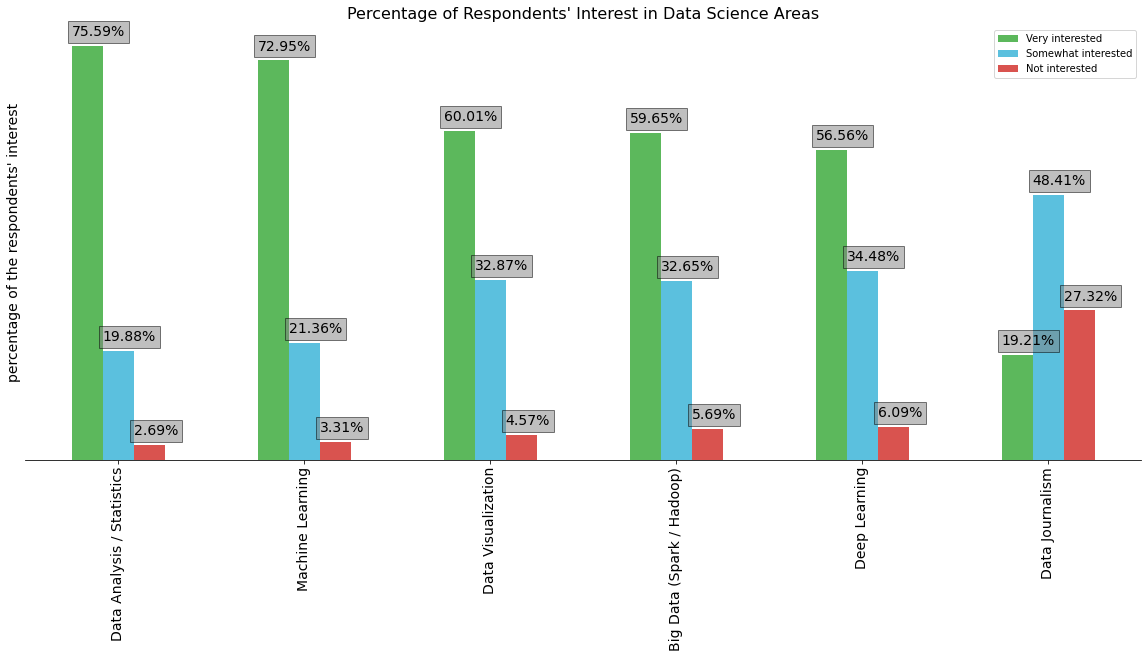

In [4]:
#Sort the data in descending order of Very Interested
data = df.sort_values("Very interested", ascending=False)
#Converte the date to percentage in each category
dataPer = ((data * 100) / 2233).round(2)

# plot bar chart
# Here we use use a figure size of (20, 8), bar width of 0.8
# Use font size 14 for the bar labels, percentages, and legend, and use font size 16 for the title
# Use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars

barChart = dataPer.plot(kind='bar', figsize=(20, 8), color = ['#5cb85c', '#5bc0de', '#d9534f'], legend=True, fontsize=14)
barChart.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16) # add title to the plot
plt.ylabel ("percentage of the respondents' interest", fontsize = 14)

# Display the percentages and remove the left, top, and right borders.
plt.xticks(fontsize = 14)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.yticks([])

for i in barChart.patches:
    # get_x pulls left or right; get_height pushes up or down
    barChart.text(i.get_x(), i.get_height()+ 1.8, \
            str(round(i.get_height(), 2))+'%', fontsize=14,
                color='black', bbox=dict(facecolor='grey', alpha=0.5))
plt.show()

## Part 2

Create a Choropleth map to visualize crime in San Francisco.
Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes(including all the 39 crime type categories).

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

Central, Southern, Bayview, Mission, Park, Richmond, Ingleside, Taraval, Northern, and, Tenderloin.

In [5]:
# Insert the uploaded file and changed to pandas DataFrame to code

df_SF = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_SF[['Category','PdDistrict']].groupby(['PdDistrict'], as_index = False).count()


,PdDistrict,Category
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [6]:
# install Folium since it's not a default package and then import it
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium
print('Folium installed and imported!')


     |████████████████████████████████| 94 kB 4.4 MB/s  eta 0:00:01
Folium installed and imported!


In [7]:
# create a map of San Francisco and display it
# San Francisco latitude and longitude values are 37.7749° N and 122.4194° W
print (df_SF.shape) #So there are 150500 crime records

latitude = 37.7749
longitude = -122.4194 
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start = 12)
sanfran_map



(150500, 13)


In [8]:
# Map with marks
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# To save computational cost and avoid the map with marks being too congested, we will only use the first 100 crimes in the dataframe
limit = 100
df_SF100 = df_SF.iloc[0:limit, :]

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_SF100.Y, df_SF100.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7
        )
    )
    
# add pop-up text to each marker on the map
latitudes = list(df_SF100.Y)
longitudes = list(df_SF100.X)
labels = list(df_SF100.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    

# add incidents to map
sanfran_map.add_child(incidents)

In [13]:
# Map with group marks

from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_SF100.Y, df_SF100.X, df_SF100.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [10]:
# Creating Choropleth map

df_SFChro = df_SF[['Category','PdDistrict']]

# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
SF_geo = r'san-francisco.geojson' # geojson file

# Clean data
df_SF.head()
df_select = df_SF.loc[:,["PdDistrict"]]
df_select.head(10)
# Count the number of records for each district and add it to the dataframe
df_select['Count'] = df_select.groupby('PdDistrict')['PdDistrict'].transform('count')
df_select = df_select.drop_duplicates()
#df_select
df_final = df_select.iloc[0:10,:]
df_final # The last row is Nan so we only need the first 10 rows

# Plot
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12)
sf_map.choropleth(
    geo_data = SF_geo,
    data = df_final,
    columns = ['PdDistrict', 'Count'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Crime Rates in San Francisco'
)

# display map
sf_map